---

# <center> ★ AI & ML Project - Amazon Product Reviews Topic Modelling ★
### <center> ***Domain: E-Commerce***

---

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Amazon_Product_Ratings_Topic_Modelling/main/Amazon.png" style="width: 800px;"/>

---

### Description:

The dataset is samples of Amazon Ratings for select produts. The reviews are picked randomly and the corpus has nearly 1.6k reviews of different customers.\
Amazon aims to understand what are the main topics of these reviews to classify them for easier search.\
Can you build a strong model that differentiates the topics based on the reviews corpus? 

#### Acknowledgements
The dataset is referred from Kaggle.

### Objective:
- Understand the Dataset & perform the necessary cleanup.
- Build a strong Topic Modelling Algorithm to classify the topics.

---

#### Importing the necessary libraries

In [1]:
# import libraries  
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
#from pyLDAvis import gensim_models as pg
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


In [2]:
df = pd.read_csv('../input/amazon-product-reviews-dataset/7817_1.csv')
print(df.shape)
df.head()

(1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


Let's now filter the dataframe to only one product - Amazon Echo. If you are not aware of Echo, <a href="https://www.amazon.in/Amazon-Echo-control-weather-Powered/dp/B0749YXL1J?tag=googinhydr18418-21">here's the amazon page</a>.

In [3]:
# filter for product id = amazon echo
df = df[df['asins']=="B01BH83OOM"]
print(df.shape)
df.head()

(542, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
852,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,",NaN,NaN,Deanokat,NaN,8.416670e+11,1.75 lbs
853,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,NaN,NaN,Heather A,NaN,8.416670e+11,1.75 lbs
854,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...,NaN,NaN,Quentin Moore,NaN,8.416670e+11,1.75 lbs
855,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Look at this product as a portable speaker fir...,Great for what it does,NaN,NaN,Casey,NaN,8.416670e+11,1.75 lbs
856,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker",NaN,NaN,Tazman3582,NaN,8.416670e+11,1.75 lbs


### Preprocessing

Let's first do some preprocessing. For tokenisation, though one can use NLTK as well, let's try using gensim's ```simple_preprocess``` this time. The preprocessing pipeline is mentioned below.<br>

1. Tokenize each review (using gensim)
2. Remove stop words (including punctuations)
3. Lemmatize (using spacy)

Though you can build topic models without lemmatisation, it is actually quite important (and highly recommended) because otherwise you may end up getting topics having similar words for e.g. *speaker, speakers* etc. (which are basically referring to the same thing - speaker).

Note that lemmatization uses POS tags of words, so we need to specify a list of POS tags - here we've used ```['NOUN', 'ADJ', 'VERB', 'ADV']``` .

In [4]:
# tokenize using gensim simple_preprocess
def sent_to_words(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  


# convert to list
data = df['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

# sample
print(data_words[3])

['look', 'at', 'this', 'product', 'as', 'portable', 'speaker', 'first', 'and', 'an', 'echo', 'replacement', 'second', 'the', 'big', 'reason', 'to', 'buy', 'this', 'over', 'standard', 'bluetooth', 'speakers', 'is', 'this', 'has', 'wifi', 'streaming', 'enabled', 'when', 'you', 'are', 'at', 'home', 'you', 'can', 'stream', 'music', 'with', 'ease', 'to', 'it', 'voice', 'recognition', 'is', 'top', 'notch', 'and', 'it', 'really', 'shines', 'when', 'using', 'it', 'with', 'other', 'smart', 'home', 'accessories', 'the', 'only', 'problem', 'is', 'having', 'to', 'tap', 'the', 'microphone', 'button', 'for', 'it', 'to', 'listen', 'to', 'your', 'voice', 'if', 'you', 'want', 'bigger', 'sound', 'and', 'always', 'listening', 'features', 'spend', 'the', 'extra', 'money', 'on', 'the', 'amazon', 'echo']


The code below creates a list of stop words. The 'string' module in python comes with a list of punctuation characters, which we'll append to the builtin stopwords of NLTK.

In [5]:
# create list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)


In [6]:
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

**Important Note:** All models are not automatically downloaded with spacy, so you will need to do a ```python -m spacy download en``` to use its preprocessing methods.

In [7]:
# call functions

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER 
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['look', 'product', 'portable', 'speaker', 'replacement', 'second', 'big', 'reason', 'buy', 'standard', 'bluetooth', 'speaker', 'enable', 'home', 'stream', 'music', 'ease', 'voice', 'recognition', 'top', 'notch', 'really', 'shine', 'use', 'smart', 'home', 'accessory', 'problem', 'tap', 'microphone', 'button', 'listen', 'voice', 'want', 'big', 'sound', 'always', 'listen', 'feature', 'spend', 'extra', 'money', 'amazon', 'echo']


In [8]:
# compare the nostop, lemmatised version with the original one
# note that speakers is lemmatised to speaker; 
print(' '.join(data_words[3]), '\n')
print(' '.join(data_lemmatized[3]))

look at this product as portable speaker first and an echo replacement second the big reason to buy this over standard bluetooth speakers is this has wifi streaming enabled when you are at home you can stream music with ease to it voice recognition is top notch and it really shines when using it with other smart home accessories the only problem is having to tap the microphone button for it to listen to your voice if you want bigger sound and always listening features spend the extra money on the amazon echo 

look product portable speaker replacement second big reason buy standard bluetooth speaker enable home stream music ease voice recognition top notch really shine use smart home accessory problem tap microphone button listen voice want big sound always listen feature spend extra money amazon echo


### Creating Dictionary and Corpus

Gensim's LDA requires the data in a certain format. Firstly, it needs the corpus as a dicionary of id-word mapping, where each word has a unique numeric ID. This is for computationally efficiency purposes. Secondly, it needs the corpus as a term-document frequency matrix which contains the frequency of each word in each document.

In [9]:
# create dictionary and corpus
# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(3, 5), (12, 2), (15, 2), (16, 3), (19, 2), (23, 4), (27, 2), (30, 1), (34, 1), (47, 2), (50, 1), (55, 1), (59, 5), (68, 1), (80, 1), (83, 8), (86, 1), (89, 2), (94, 1), (95, 1), (96, 2), (98, 1), (99, 1), (108, 2), (112, 1), (116, 1), (120, 1), (129, 2), (132, 1), (135, 1), (142, 1), (143, 1), (144, 2), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 2), (155, 1), (156, 2), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 2), (166, 1), (167, 3), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1), (179, 1), (180, 1), (181, 2), (182, 1), (183, 1), (184, 2), (185, 2), (186, 5), (187, 1), (188, 3), (189, 2), (190, 1), (191, 3), (192, 1), (193, 1), (194, 1), (195, 1), (196, 6), (197, 1), (198, 1), (199, 1), (200, 2), (201, 1), (202, 2), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 2), (209, 1), (210, 1), (211, 2), (212, 1)]


The (3, 7) above represents the fact that the word with id=3 appears 7 times in the second document (review), word id 12 appears twice and so on. The nested list below shows the frequencies of words in the first document.

In [10]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('admit', 1),
  ('alexa', 2),
  ('allow', 1),
  ('amazon', 4),
  ('announce', 1),
  ('answer', 1),
  ('anyway', 1),
  ('app', 2),
  ('appealing', 1),
  ('associate', 1),
  ('avid', 1),
  ('aware', 1),
  ('battery', 3),
  ('buy', 1),
  ('choose', 2),
  ('command', 1),
  ('control', 1),
  ('convenience', 1),
  ('cook', 1),
  ('day', 1),
  ('decide', 2),
  ('demand', 1),
  ('development', 1),
  ('device', 3),
  ('drain', 1),
  ('early', 2),
  ('easily', 2),
  ('echo', 3),
  ('echos', 1),
  ('enable', 1),
  ('especially', 1),
  ('fabulous', 1),
  ('financial', 1),
  ('firmware', 1),
  ('first', 1),
  ('free', 6),
  ('get', 1),
  ('give', 1),
  ('go', 1),
  ('hand', 6),
  ('high', 1),
  ('hope', 1),
  ('important', 1),
  ('introduce', 1),
  ('keep', 1),
  ('kitchen', 1),
  ('lack', 1),
  ('life', 1),
  ('listener', 1),
  ('little', 2),
  ('lot', 1),
  ('love', 1),
  ('major', 1),
  ('make', 1),
  ('maximum', 1),
  ('microphone', 1),
  ('mind', 1),
  ('minimal', 1),
  ('mode', 2),
  ('musi

### Building the Topic Model

Let's now build the topic model. We'll define 10 topics to start with. The hyperparameter `alpha` affects sparsity of the document-topic
(theta) distributions, whose default value is 1. Similarly, the hyperparameter `eta` can also be specified, which affects the topic-word distribution's sparsity.



In [11]:
# help(gensim.models.ldamodel.LdaModel)

In [12]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Let's now print the topics found in the dataset.

In [13]:
# print the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"use" + 0.027*"say" + 0.023*"great" + 0.022*"get" + 0.021*"music" + '
  '0.020*"buy" + 0.018*"alexa" + 0.017*"enjoy" + 0.015*"find" + '
  '0.014*"device"'),
 (1,
  '0.050*"beat" + 0.035*"useful" + 0.023*"additional" + 0.019*"store" + '
  '0.015*"walk" + 0.012*"piece" + 0.007*"chagrin" + 0.007*"cut" + '
  '0.007*"around" + 0.007*"procrastinated"'),
 (2,
  '0.061*"easy" + 0.049*"use" + 0.039*"music" + 0.032*"question" + '
  '0.031*"great" + 0.027*"fun" + 0.025*"play" + 0.025*"ask" + 0.023*"really" + '
  '0.023*"tap"'),
 (3,
  '0.051*"know" + 0.047*"overall" + 0.021*"fire" + 0.019*"application" + '
  '0.018*"backyard" + 0.015*"podcast" + 0.014*"request" + 0.014*"continue" + '
  '0.014*"calendar" + 0.011*"playback"'),
 (4,
  '0.051*"love" + 0.033*"buy" + 0.032*"connect" + 0.025*"purchase" + '
  '0.023*"gift" + 0.019*"tap" + 0.016*"give" + 0.016*"charge" + '
  '0.015*"excellent" + 0.015*"stream"'),
 (5,
  '0.030*"price" + 0.029*"worth" + 0.018*"build" + 0.018*"hype" + 0.018*"p

Let's now evaluate the model using coherence score.

In [14]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43460377264509686


Now lets visualise the topics. The `pyLDAvis` library comes with excellent interactive visualisation capabilities.

In [15]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.228497 -0.200626       1        1  28.832654
8     -0.228332 -0.075977       2        1  28.726732
4     -0.048773  0.181964       3        1  13.122652
0     -0.093168  0.078850       4        1  13.082180
2     -0.150594  0.163048       5        1  10.764120
6      0.160437 -0.049598       6        1   1.887242
3      0.159015 -0.021432       7        1   1.275890
5      0.152271 -0.036807       8        1   0.968740
7      0.132970 -0.022033       9        1   0.714216
1      0.144672 -0.017388      10        1   0.625573, topic_info=         Term        Freq       Total Category  logprob  loglift
27       echo  187.000000  187.000000  Default  30.0000  30.0000
167      good  137.000000  137.000000  Default  29.0000  29.0000
189   product   63.000000   63.000000  Default  28.0000  28.0000
396      easy   62.000000   62.000000  Default  27.0000  27.0000
13        buy   96.000000   96.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1019    cheap    0.311078    1.951235  Topic10  -5.2009   3.2381
535      shop    0.030401    0.802372  Topic10  -7.5264   1.8012
526      rake    0.030401    0.802384  Topic10  -7.5264   1.8012
1142     side    0.030536    3.998495  Topic10  -7.5220   0.1995
451      tune    0.030501    3.628090  Topic10  -7.5232   0.2956

[463 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
281       2  0.990851        able
229       2  0.928144      access
144       1  0.433796    activate
144       4  0.542245    activate
606       1  0.964339  activation
...     ...       ...         ...
314       1  0.665415       worth
314       8  0.190118       worth
142       3  0.806292        year
142       4  0.100786        year
696       6  0.788089         yet

[477 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 5, 1, 3, 7, 4, 6, 8, 2])

## Hyperparameter Tuning - Number of Topics and Alpha

Let's now tune the two main hyperparameters - number of topics and alpha. The strategy typically used is to tune these parameters such that the coherence score is maximised.

In [16]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [17]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 1]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [18]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.467340
1,0.01,6,0.465695
2,0.01,10,0.426646
3,0.01,15,0.438815
4,0.01,20,0.432718
5,0.10,2,0.470828
6,0.10,6,0.432863
7,0.10,10,0.448954
8,0.10,15,0.399676
9,0.10,20,0.421171


In [19]:
coherence_df.sort_values('coherence_value')

,alpha,num_topics,coherence_value
8,0.10,15,0.399676
9,0.10,20,0.421171
2,0.01,10,0.426646
4,0.01,20,0.432718
6,0.10,6,0.432863
3,0.01,15,0.438815
7,0.10,10,0.448954
1,0.01,6,0.465695
11,1.00,6,0.466993
0,0.01,2,0.467340


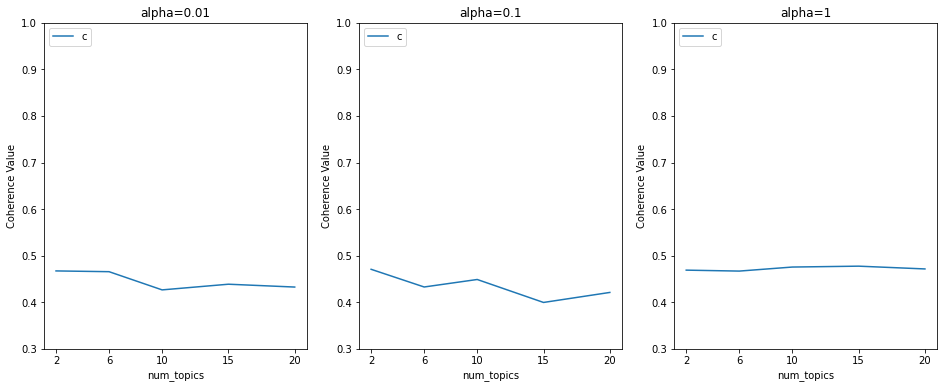

In [20]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [21]:
#Finally building the LDA Model by selecting 

Final_LDA_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=6,
                                                  random_state=100,
                                                  update_every=1,
                                                  chunksize=100,
                                                  passes=10,
                                                  alpha=1,
                                                  per_word_topics=True)

In [22]:
# print the 10 topics
pprint.pprint(Final_LDA_model.print_topics())
doc_lda = Final_LDA_model[corpus]

[(0,
  '0.051*"speaker" + 0.041*"echo" + 0.039*"tap" + 0.031*"well" + 0.025*"get" + '
  '0.023*"portable" + 0.021*"voice" + 0.019*"sound" + 0.019*"nice" + '
  '0.018*"good"'),
 (1,
  '0.055*"use" + 0.028*"ask" + 0.024*"music" + 0.023*"question" + '
  '0.023*"really" + 0.020*"fun" + 0.017*"device" + 0.016*"alexa" + '
  '0.016*"also" + 0.016*"buy"'),
 (2,
  '0.056*"alexa" + 0.054*"great" + 0.049*"work" + 0.032*"echo" + '
  '0.031*"button" + 0.026*"portable" + 0.026*"tap" + 0.024*"take" + '
  '0.020*"time" + 0.018*"set"'),
 (3,
  '0.090*"tap" + 0.048*"echo" + 0.043*"get" + 0.024*"dot" + 0.023*"enjoy" + '
  '0.017*"much" + 0.016*"even" + 0.013*"room" + 0.012*"first" + '
  '0.012*"weather"'),
 (4,
  '0.054*"music" + 0.040*"play" + 0.039*"amazon" + 0.030*"speaker" + '
  '0.026*"love" + 0.023*"tap" + 0.019*"thing" + 0.018*"connect" + 0.017*"use" '
  '+ 0.017*"listen"'),
 (5,
  '0.080*"sound" + 0.063*"great" + 0.059*"love" + 0.052*"good" + '
  '0.034*"product" + 0.031*"use" + 0.030*"buy" + 0.0

In [23]:
# coherence score
coherence_model_lda = CoherenceModel(model=Final_LDA_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4117722875480922


In [24]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(Final_LDA_model, corpus, id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.026104  0.071554       1        1  18.306513
0      0.108271 -0.055120       2        1  18.193386
2      0.098783 -0.136362       3        1  17.983461
1     -0.165399  0.194596       4        1  15.589051
5     -0.204110 -0.172082       5        1  15.277069
3      0.188558  0.097415       6        1  14.650520, topic_info=      Term        Freq       Total Category  logprob  loglift
168  great  191.000000  191.000000  Default  30.0000  30.0000
80   sound  171.000000  171.000000  Default  29.0000  29.0000
83     tap  264.000000  264.000000  Default  28.0000  28.0000
27    echo  183.000000  183.000000  Default  27.0000  27.0000
51    love  135.000000  135.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
37    give   10.803155   20.025910   Topic6  -4.8069   1.3035
13     buy   15.011460   88.390588   Topic6  -4.4779   0.1477
117  house    9.542601   27.316538   Topic6  -4.9310   0.8690
53    make   10.415018   40.240966   Topic6  -4.8435   0.5691
89    time    9.635133   52.857950   Topic6  -4.9213   0.2185

[332 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
101       1  0.950767  ability
281       2  0.054473     able
281       3  0.653681     able
281       4  0.190657     able
281       5  0.081710     able
...     ...       ...      ...
335       2  0.010878     work
335       3  0.859341     work
335       4  0.119655     work
314       5  0.900226    worth
142       1  0.935057     year

[425 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 6, 4])

In [25]:
#<<<------------------------------------------THE END---------------------------------------------->>